In [67]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.quantum_info import Statevector,Operator,DensityMatrix
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from qiskit.primitives import Sampler

In [68]:
qr = QuantumRegister(4,'Q')
qr_ancilla = QuantumRegister(4,'a')
cr = ClassicalRegister(4,'meas')

In [69]:
qc = QuantumCircuit(qr,qr_ancilla,cr)
qc.h(qr)
qc.h(qr_ancilla)
# qc.draw('mpl')

In [70]:
fixed_initial_superposition_state = Statevector.from_label('++')
# plot_bloch_multivector(fixed_initial_superposition_state)

In [71]:
marked_state1 = Statevector.from_label('01')
marked_state2 = Statevector.from_label('00')
marked_state3 = Statevector.from_label('01')
marked_state4 = Statevector.from_label('01')
marked_state2.draw('latex')

<IPython.core.display.Latex object>

In [72]:
grover_oracle1 = Operator.from_label('II') - 2* DensityMatrix(marked_state1)
grover_oracle2 = Operator.from_label('II') - 2* DensityMatrix(marked_state2)
grover_oracle3 = Operator.from_label('II') - 2* DensityMatrix(marked_state3)
grover_oracle4 = Operator.from_label('II') - 2* DensityMatrix(marked_state4)
# grover_oracle1.draw('latex')

In [73]:
fixed_grover_diffusion_op = 2* DensityMatrix(fixed_initial_superposition_state) - Operator.from_label('II')
fixed_grover_diffusion_op.draw('latex')

<IPython.core.display.Latex object>

In [74]:
qc.unitary(grover_oracle1,[qr[0],qr_ancilla[0]],'O1')
qc.unitary(grover_oracle2,[qr[1],qr_ancilla[1]],'O2')
qc.unitary(grover_oracle3,[qr[2],qr_ancilla[2]],'O3')
qc.unitary(grover_oracle4,[qr[3],qr_ancilla[3]],'O4')
# qc.draw('mpl')

In [75]:
qc.unitary(fixed_grover_diffusion_op,[qr[0],qr_ancilla[0]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[1],qr_ancilla[1]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[2],qr_ancilla[2]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[3],qr_ancilla[3]],'D')
# qc.draw('mpl')

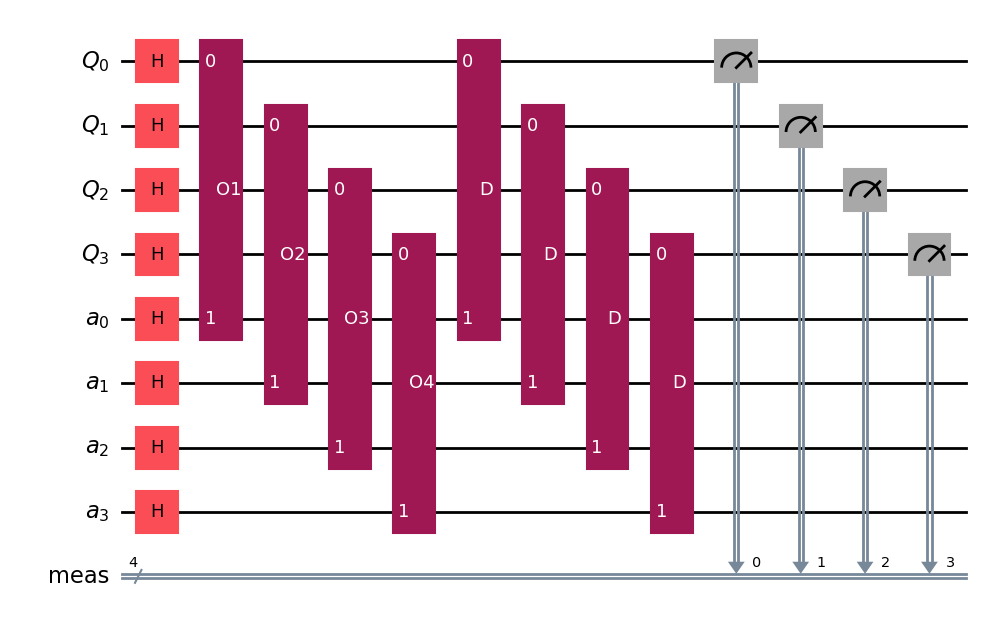

In [76]:

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw('mpl',reverse_bits=False)

In [77]:
sampler = Sampler()
job = sampler.run(qc)
counts = job.result().quasi_dists[0]


def binary_counts(counts:dict,num_qubits:int):
    bindigits = 2 ** num_qubits
    bin_counts = {f"{key:0{num_qubits}b}" : value for key , value in counts.items()}
    return bin_counts

bin_counts = binary_counts(counts,4)

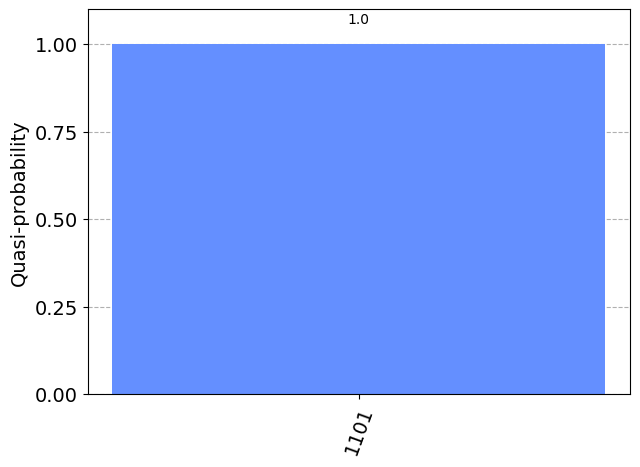

In [78]:
plot_histogram(bin_counts)

In [79]:
qc.decompose(reps=2).depth()

8

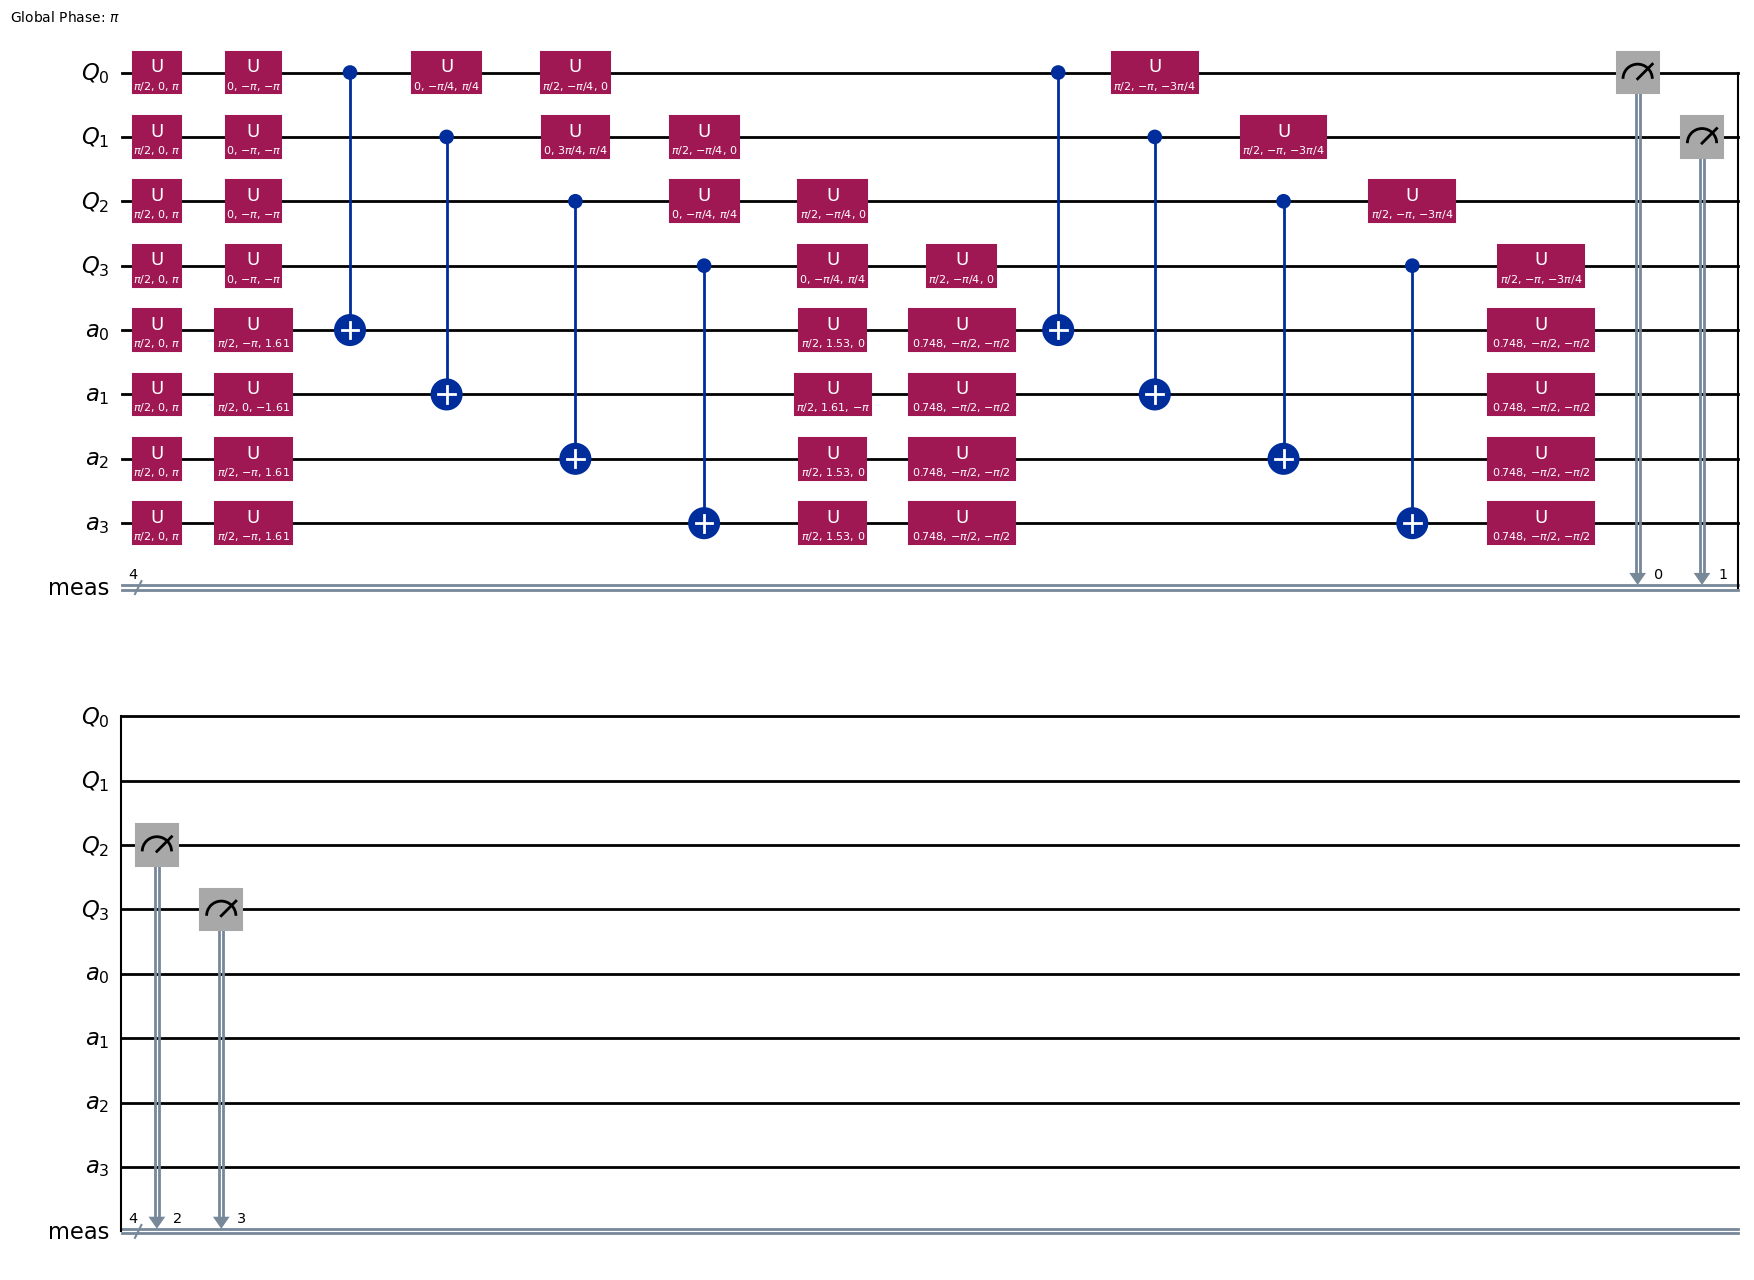

In [80]:
qc.decompose(reps=3).draw('mpl')

In [81]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('cx',0)
print(cnot_count)

8


In [82]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('u',0)
print(cnot_count)

40
